# Machine Learning With Movie Ratings
by Shuyan Liu

In this notebook, I explored the Movie Ratings dataset with various Machine Learning Methods including regression models and classification models.

In [1]:
# importing packages needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
pd.set_option('display.max_colwidth', 1000)

In [10]:
# Load Data
data = pd.read_csv('/Users/shuyan/Desktop/DS1001/Data Analysis 1/movieReplicationSet.csv')
data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## Data Preprocessing

Since we will be analyzing the data with regression, we need to handle missing values. The missing values in the movie rating data are labeled as NaN, these were filled with a 50/50 split of row means and column means. Moreover, user 896 did not rate any of the movies so we removed the entire row since it provides no information.

We decided not to apply any data transformation for this dataset since the data collected is on the same scale. 

In [5]:
# Data preprocessing - fill NaNs with mean of each column and each row of 50/50 blend
# Assuming df is your DataFrame
# Calculate the mean of each column
column_means = data.iloc[:,0:400].mean(axis=0)

# Calculate the mean of each row
row_means = data.iloc[:,0:400].mean(axis=1)

# Replace NaN values with a blend of column and row means
df_filled = data.copy()
for col in data.iloc[:,0:400].columns:
    for idx in data.iloc[:,0:400].index:
        if pd.isna(data.loc[idx, col]):
            # Blend the means (50/50)
            blend_value = 0.5 * (column_means[col] + row_means[idx])
            df_filled.loc[idx, col] = blend_value

In [6]:
# Check if row_means has any NaN values
nan_indices = row_means.isnull()

# Get the indices where row_means has NaN values
indices_with_nan = nan_indices[nan_indices].index

# Remove corresponding rows from df_filled
df_filled = df_filled.drop(indices_with_nan)

# Reset index after removing rows
df_filled = df_filled.reset_index(drop=True)
df_filled

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1092,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1093,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1094,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## Simple Linear regression model
In this part we applied a simple linear regression model to predict the ratings of each movie, for each of the 400 movies, we find the movie that predicts the ratings the best.

In [7]:

# Initialize lists to store COD values and best predictor for each movie
cod_values = []
best_predictors = []

# Loop through each movie
for target_movie in range(0, 400):
    # Select the target movie ratings
    target_ratings = df_filled.iloc[:, target_movie]

    # Initialize variables to store best predictor and COD
    best_predictor = None
    best_cod = -1

    # Loop through each other movie to build regression models
    for other_movie in range(0, 400):
        if other_movie != target_movie:
            # Select the other movie ratings
            other_ratings = df_filled.iloc[:, other_movie]

            # Prepare data for regression
            X = other_ratings.values.reshape(-1, 1)
            y = target_ratings.values.reshape(-1, 1)

            # Split data into training and testing sets
            # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Build linear regression model
            model = LinearRegression()
            # model.fit(X_train, y_train)
            model.fit(X, y)

            # Predict the ratings for the target movie
            # predicted_ratings = model.predict(X_test)
            predicted_ratings = model.predict(X)

            # Calculate COD
            cod = r2_score(y, predicted_ratings)

            # Update best predictor if current model has higher COD
            if cod > best_cod:
                best_cod = cod
                best_predictor = other_movie

    # Store COD value and best predictor for the current movie
    cod_values.append(best_cod)
    best_predictors.append(best_predictor)

# Calculate average COD
average_cod = np.mean(cod_values)

# Print average COD
print("Average COD:", average_cod)


Average COD: 0.42378171067196035


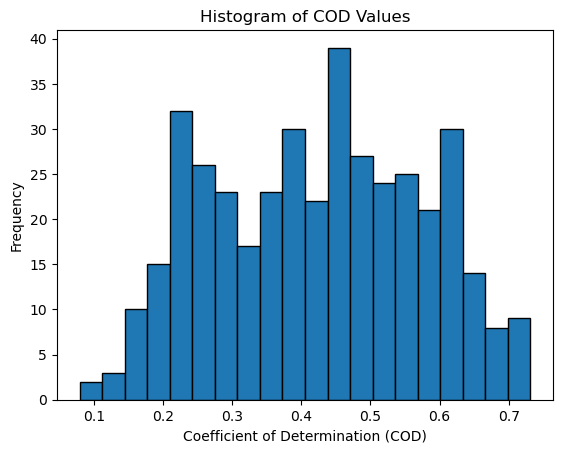

In [8]:
# Create a histogram of COD values
plt.hist(cod_values, bins=20, edgecolor='black')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('Frequency')
plt.title('Histogram of COD Values')
plt.show()

# Create a table of top and bottom predictors
result_df = pd.DataFrame({
    'Movie': df_filled.columns[0:400],
    'COD': cod_values,
    'Best Predictor': df_filled.columns[best_predictors]
})

# Sort the DataFrame by COD values
result_df = result_df.sort_values(by='COD', ascending=False)

# Display the top and bottom 10 movies
top_10 = result_df.head(10)
bottom_10 = result_df.tail(10)

We found that the average COD of each movies best predictor is 0.423 with an distribution of the histogram shown above. Below showed the the top 10 movies and the bottom 10 movies that achieved highest and lowest COD and its associated predictor.

In [9]:
top_10

,Movie,COD,Best Predictor
203,Erik the Viking (1989),0.731507,I.Q. (1994)
208,I.Q. (1994),0.731507,Erik the Viking (1989)
395,Patton (1970),0.713554,The Lookout (2007)
377,The Lookout (2007),0.713554,Patton (1970)
240,The Bandit (1996),0.711222,Best Laid Plans (1999)
249,Best Laid Plans (1999),0.711222,The Bandit (1996)
282,Congo (1995),0.700569,The Straight Story (1999)
287,The Straight Story (1999),0.700569,Congo (1995)
334,The Final Conflict (1981),0.700188,The Lookout (2007)
300,Ran (1985),0.692734,Heavy Traffic (1973)


In [11]:
bottom_10

,Movie,COD,Best Predictor
248,Grown Ups 2 (2013),0.171119,The Core (2003)
14,The Fast and the Furious (2001),0.168991,Terminator 3: Rise of the Machines (2003)
41,13 Going on 30 (2004),0.160164,Can't Hardly Wait (1998)
292,Titanic (1997),0.154136,Cocktail (1988)
319,La La Land (2016),0.148514,The Lookout (2007)
190,The Cabin in the Woods (2012),0.143887,The Evil Dead (1981)
55,Clueless (1995),0.141426,Escape from LA (1996)
9,Black Swan (2010),0.117080,Sorority Boys (2002)
95,Interstellar (2014),0.111343,Torque (2004)
80,Avatar (2009),0.079485,Bad Boys (1995)


With the simple linear regression model, we explored each movies best predictor and the result showed us that some movies ratings are higly correlated with other movies, for example, using the movie rating from I.Q.(1994) we can effectively predict the ratings of Erik the Viking (1989). However, for movies like Avatar (2009) no movies in our data can provide a effective prediction.

# Mutiple Regression Model
In this part, we will add three categorical questions to achieve a better prediction. The questions are: gender identity (column 475), sibship status (column 476) and social viewing preferences (column 477) as additional predictors (in addtion to the best predicitng movie we had from last part.)

In [11]:
# explore the each of the three categorical questions
df_filled.iloc[:,474].value_counts(dropna=False)

Gender identity (1 = female; 2 = male; 3 = self-described)
1.0    807
2.0    260
NaN     23
3.0      6
Name: count, dtype: int64

In [12]:
df_filled.iloc[:,475].value_counts(dropna=False)

Are you an only child? (1: Yes; 0: No; -1: Did not respond)
 0    894
 1    177
-1     25
Name: count, dtype: int64

In [13]:
df_filled.iloc[:,476].value_counts(dropna=False)

Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
 1    610
 0    462
-1     24
Name: count, dtype: int64

Top and bottom predictors from last question are extracted to evalue our model in this part.

In [14]:
# Create a table of top and bottom predictors
result_df_idx = pd.DataFrame({
    'Movie': df_filled.columns[0:400],
    'COD': cod_values,
    'Best Predictor': best_predictors
})

# Sort the DataFrame by COD values
result_df_idx = result_df_idx.sort_values(by='COD', ascending=False)

# Display the top and bottom 10 movies
top_10_idx = result_df_idx.head(10)
bottom_10_idx = result_df_idx.tail(10)

In [15]:
selected_movies = pd.concat([top_10_idx, bottom_10_idx], axis=0, ignore_index=False)
selected_movies

,Movie,COD,Best Predictor
203,Erik the Viking (1989),0.731507,208
208,I.Q. (1994),0.731507,203
395,Patton (1970),0.713554,377
377,The Lookout (2007),0.713554,395
240,The Bandit (1996),0.711222,249
249,Best Laid Plans (1999),0.711222,240
282,Congo (1995),0.700569,287
287,The Straight Story (1999),0.700569,282
334,The Final Conflict (1981),0.700188,377
300,Ran (1985),0.692734,309


Because the additional predictors such as gender identity had categorical answers with 3 answers, we applied one-hot encoding to these categorical predictors, ommiting the first column to prevent multicollinearity. Our X in this problem will be the ratings of the best predictor movie we had in question 1 for each of the 20 movies in addition to three categorical answers. Y will be the ratings of each of the top 10 and the bottom 10 movies.

In [16]:
# Build multiple regression models
all_r2_values = []

for idx,movie in selected_movies.iterrows():
    # Select predictors and target variable
    X = df_filled.iloc[:, [474, 475, 476, movie['Best Predictor']]]
    y = df_filled.iloc[:, idx]

    # Perform one-hot encoding for categorical predictors
    X_encoded = pd.get_dummies(X, columns=["Gender identity (1 = female; 2 = male; 3 = self-described)",
                                           "Are you an only child? (1: Yes; 0: No; -1: Did not respond)",
                                           "Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"], drop_first=True)

    model = LinearRegression()
    model.fit(X_encoded, y)

    # Predict the ratings
    y_pred = model.predict(X_encoded)

    # Calculate R^2
    r2_value = r2_score(y, y_pred)
    all_r2_values.append(r2_value)

# Print R^2 values
print("R^2 values for multiple regression models:", all_r2_values)


R^2 values for multiple regression models: [0.7332162219231575, 0.7320320337739616, 0.7147645016135739, 0.7157574588283077, 0.7132378408903512, 0.7127504305710848, 0.7009323893241193, 0.7023364910530504, 0.7023460009805844, 0.6932845595752776, 0.18170476655633494, 0.1782350811633714, 0.16816900101231735, 0.16322703516989456, 0.15653372555539402, 0.15899612841221122, 0.148708372754759, 0.12319280205666583, 0.11935594031636232, 0.08278644290778259]


In [ ]:
(all_r2_values - selected_movies['COD']).mean()

0.0049397491008224435

In [ ]:
#top movies
(all_r2_values[:10] - selected_movies['COD'][:10]).mean()

0.0014030356106208175

In [ ]:
#bottom movies
(all_r2_values[10:] - selected_movies['COD'][10:]).mean()

0.00847646259102407

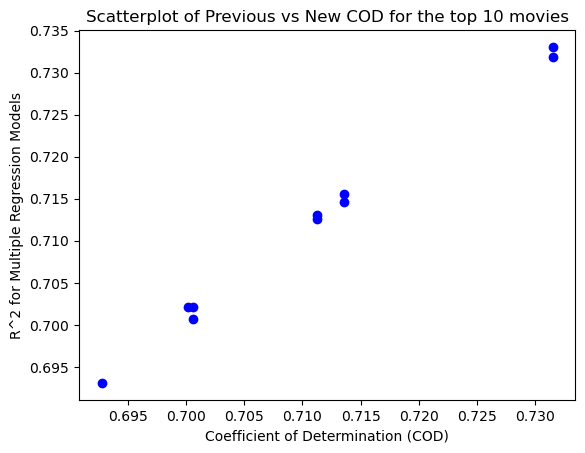

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(selected_movies['COD'][:10], all_r2_values[:10], color='blue')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('R^2 for Multiple Regression Models')
plt.title('Scatterplot of Previous vs New COD for the top 10 movies')
plt.show()


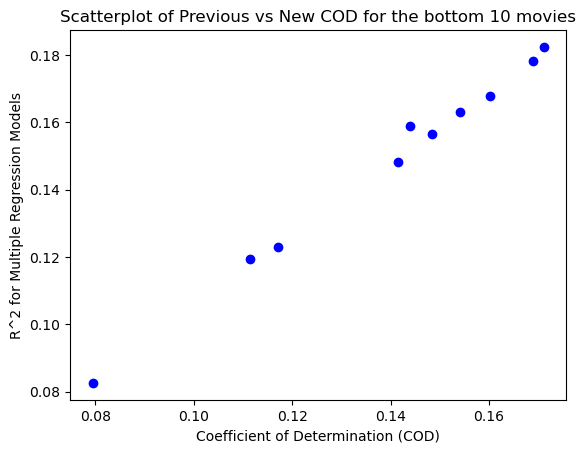

<Figure size 640x480 with 0 Axes>

In [22]:
plt.scatter(selected_movies['COD'][10:], all_r2_values[10:], color='blue')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('R^2 for Multiple Regression Models')
plt.title('Scatterplot of Previous vs New COD for the bottom 10 movies')
plt.show()


We ran the model for all 20 movies and calculated the R² of each movie. We calculated the mean of the difference between the new and the previous R². On average the R² improved by 0.00494. For the top 10 movies, it improved by 0.0014, and for the bottom 10, it improved by 0.0085. This suggests that with the additional predictors, our model improved. The bottom 10 movies exhibited better improvement which suggests that the new categorical variables added more explanatory power to the bottom 10 movies compared to the top 10 movies. We can also see from the scatterplot that with the new predictors, both top and bottom movies had an increased R² which suggests an improvement of our model, however, the models are likely better at explaining the variance in the top movies compared to the bottom ones. The bottom movies also had a broader range of R² values that suggest more variability in how well the models can explain the variance of the bottom 10 movies. Despite these enhancements, the overall improvement of our model was modest.


# Regularized Regression Model: Ridge Regression (L2)
We will apply L1 and L2 regression in this part, starting from L2 to see if we can achieve a better predicting power.

First we will pick 30 movies in the middle of the COD range. After removing these 30 movies in addtion to the 20 movies in the previous models, we randomly select 10 movies in the remaining pool. These 10 movies will be our input for the ridge regression model. In the code below, we will demonstrate suitable hyperparameter tuning for our model.

In [17]:
df_trimmed = result_df.iloc[10:-10]
# Randomly sample 30 rows from the remaining data
output_df_col = df_trimmed.sample(n=30, random_state=42)
df_remaining = df_trimmed[~df_trimmed.index.isin(output_df_col.index)]
# Sample 10 more rows from the remaining data
input_df_col = df_remaining.sample(n=10, random_state=42)

In [18]:
input_10_df = df_filled.loc[:, df_filled.columns.isin(input_df_col['Movie'])]
output_30_df = df_filled.loc[:, df_filled.columns.isin(output_df_col['Movie'])]

In [19]:
input_10_df

,Inglorious Bastards (2009),Pirates of the Caribbean: Dead Man's Chest (2006),Shrek (2001),The Proposal (2009),My Big Fat Greek Wedding (2002),Goodfellas (1990),Daredevil (2003),The Hulk (2003),Friday the 13th Part III (1982),Predator (1987)
0,2.899902,0.500000,3.0,3.000000,2.818953,2.926223,2.453536,2.596709,2.486698,2.649206
1,2.892110,1.500000,3.0,2.894577,2.811161,2.918431,2.445744,2.588917,2.478906,2.641414
2,3.185881,3.000000,3.5,3.188348,3.104932,3.212202,2.739515,2.882688,2.772677,2.935185
3,3.500000,2.000000,0.5,3.000000,2.654842,2.762112,2.289425,2.432598,2.322587,2.485095
4,2.661948,2.000000,3.0,4.000000,3.500000,2.688269,2.500000,1.500000,2.248744,2.411252
...,...,...,...,...,...,...,...,...,...,...
1091,3.128474,3.004982,3.0,3.130941,3.047525,3.154795,2.682108,2.825281,2.715269,2.877778
1092,3.500000,3.500000,4.0,4.000000,3.284359,3.500000,2.918943,3.062116,3.000000,3.500000
1093,3.094739,2.500000,3.5,3.500000,3.000000,3.121060,2.648373,2.791546,2.681535,2.844043
1094,3.223786,3.100294,2.5,3.500000,3.142837,3.250107,2.777420,2.920593,2.810582,2.973090


### Hyperparameter Tuning and Model Building
We performed a grid search on 7 alpha parameter values (10-3, 10-2, ... 100, 1000) to determine which alpha value best performed the prediction. We saw that we only obtained alpha values 10 or 100. Thus, we redefined the ridge regression model, considering alpha values from 5 to 120, expecting a better-performing model (lesser RMSE)

In [21]:
rmse_results = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df

    # Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Adjust the range based on your data
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Train the ridge regression model on the training set
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train, y_train)
    betas = ridge_model.coef_
    # Predict the ratings on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results = pd.concat([rmse_results,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results = pd.concat([beta_results,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results = pd.concat([alpha_results,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [22]:
rmse_results_2 = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results_2 = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results_2 = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df

    # Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': range(5,120,5)}  # Adjust the range based on your data
    ridge = Ridge()
    grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Train the ridge regression model on the training set
    ridge_model = Ridge(alpha=best_alpha)
    ridge_model.fit(X_train, y_train)
    betas = ridge_model.coef_
    # Predict the ratings on the test set
    y_pred = ridge_model.predict(X_test)

    # Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results_2 = pd.concat([rmse_results_2,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results_2 = pd.concat([beta_results_2,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results_2 = pd.concat([alpha_results_2,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [23]:
alpha_results_2['prev_alpha'] = alpha_results['Alpha']
alpha_results_2['RMSE'] = rmse_results_2['RMSE']
alpha_results_2['prev_RMSE'] = rmse_results['RMSE']
alpha_results_2['diff_RMSE'] = alpha_results_2['RMSE'] - alpha_results_2['prev_RMSE']
alpha_results_2

,Movie,Alpha,prev_alpha,RMSE,prev_RMSE,diff_RMSE
0,Finding Nemo (2003),90,100.0,0.650672,0.650845,-0.000173
1,Who Framed Roger Rabbit (1988),25,10.0,0.433205,0.434047,-0.000842
2,Alien (1979),40,10.0,0.496382,0.501050,-0.004669
3,The Doom Generation (1995),40,10.0,0.236184,0.234063,0.002121
4,MacArthur (1977),55,100.0,0.280512,0.283314,-0.002802
5,The Exorcist (1973),40,10.0,0.665295,0.667326,-0.002031
6,Double Jeopardy (1999),10,10.0,0.334060,0.334060,0.000000
7,Ocean's Eleven (2001),75,100.0,0.513311,0.514670,-0.001358
8,The Sixth Sense (1999),20,10.0,0.566404,0.566455,-0.000051
9,Just Like Heaven (2005),115,100.0,0.348532,0.347341,0.001190


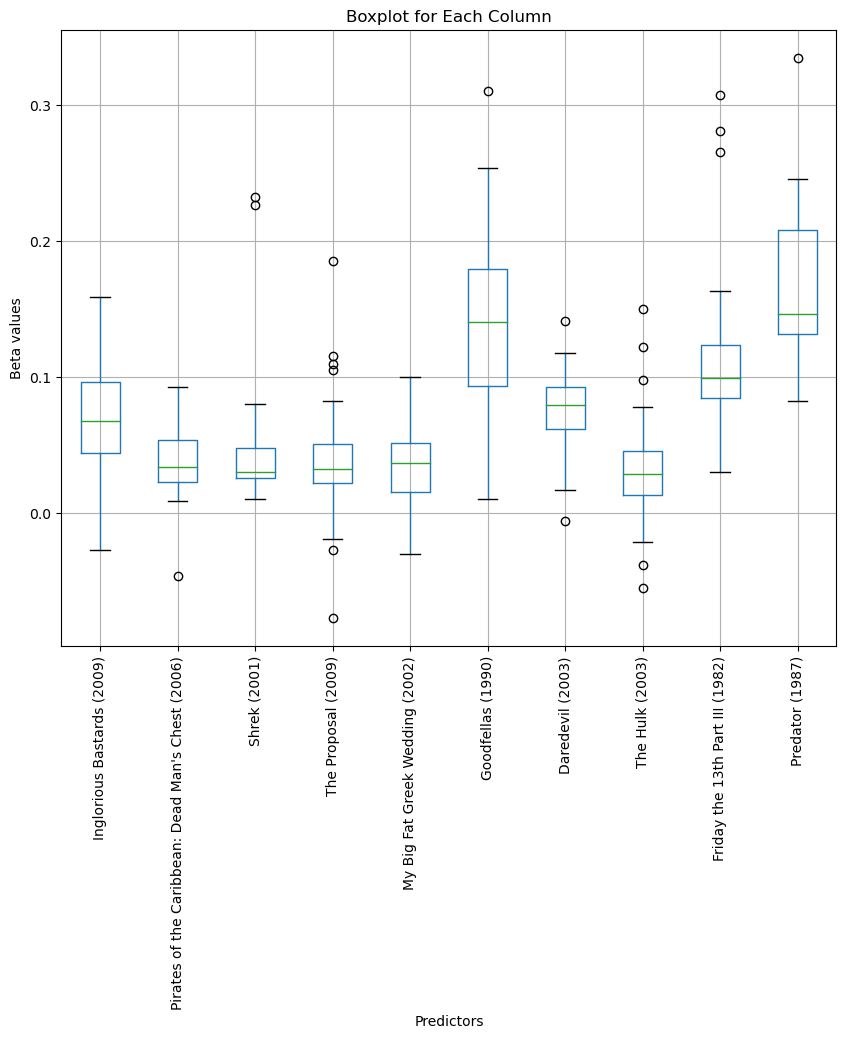

<Figure size 640x480 with 0 Axes>

In [24]:
betas = pd.DataFrame(beta_results_2.Betas.tolist(), index= beta_results_2.index)
# Create a boxplot for each column
ax = betas.boxplot(figsize=(10,8))
# Set custom x-axis labels
ax.set_xticklabels(input_10_df.columns, rotation=90)
plt.xlabel('Predictors')
plt.ylabel('Beta values')
plt.title('Boxplot for Each Column')
# Show the plot
plt.show()
plt.savefig('boxplot_ridge.png')

Although we did not see any notable improvement in the RMSE, we used this model to plot a boxplot for the beta values of each predictor (each of the 10 movies). Of the 10 sampled movies, Goodfellas and Predator were the best predictors, since they had the highest median betas and relatively fewer outliers (and even the outliers were extremely high values). The Proposal was the worst indicator since it had one of the lowest median beta values and many outliers, with one outlier being the least possible beta value. The average RMSE for this model was 0.416.


# Regularized Regression Model: LASSO Regression (L1)
In this part we will perform LASSO regression on the same data we had in the last part to see if there will be any improvement in the RMSE.

In [27]:
rmse_results_lasso = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results_lasso = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results_lasso = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df

    # Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': np.logspace(-3, 3, 7)}  # Adjust the range based on your data
    lasso = Lasso()
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Train the ridge regression model on the training set
    lasso_model = Lasso(alpha=best_alpha)
    lasso_model.fit(X_train, y_train)
    betas = lasso_model.coef_
    # Predict the ratings on the test set
    y_pred = lasso_model.predict(X_test)

    # Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results_lasso = pd.concat([rmse_results_lasso,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results_lasso = pd.concat([beta_results_lasso,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results_lasso = pd.concat([alpha_results_lasso,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [28]:
alpha_results_lasso['Alpha'].value_counts()

Alpha
0.001    23
0.010     7
Name: count, dtype: int64

In [29]:
rmse_results_lasso_2 = pd.DataFrame(columns=['Movie', 'RMSE'])
beta_results_lasso_2 = pd.DataFrame(columns=['Movie', 'Betas'])
alpha_results_lasso_2 = pd.DataFrame(columns=['Movie', 'Alpha'])

for movie in output_df_col['Movie']:
    # Select the target variable (Y)
    y = output_30_df[movie]
    X = input_10_df
    alpha_values = np.linspace(0.0001, 0.1, num=int((0.1 - 0.0001) / 0.0005) + 1)
    # Hyperparameter tuning with GridSearchCV
    param_grid = {'alpha': alpha_values}  # Adjust the range based on your data
    lasso = Lasso()
    grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

    # Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    grid_search.fit(X_train, y_train)

    # Best hyperparameter from grid search
    best_alpha = grid_search.best_params_['alpha']

    # Train the ridge regression model on the training set
    lasso_model = Lasso(alpha=best_alpha)
    lasso_model.fit(X_train, y_train)
    betas = lasso_model.coef_
    # Predict the ratings on the test set
    y_pred = lasso_model.predict(X_test)

    # Calculate RMSE and store the result in the DataFrame
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    rmse_results_lasso_2 = pd.concat([rmse_results_lasso_2,pd.DataFrame({'Movie': [movie], 'RMSE': [rmse]})], ignore_index=True)
    beta_results_lasso_2 = pd.concat([beta_results_lasso_2,pd.DataFrame({'Movie': [movie], 'Betas': [betas]})], ignore_index=True)
    alpha_results_lasso_2 = pd.concat([alpha_results_lasso_2,pd.DataFrame({'Movie': [movie], 'Alpha': [best_alpha]})], ignore_index=True)

In [30]:
rmse_results_lasso_2['RMSE'] - rmse_results_lasso['RMSE']

0     0.000869
1    -0.000018
2     0.001026
3    -0.000566
4    -0.000740
5    -0.000003
6    -0.000032
7     0.000144
8    -0.000024
9     0.001144
10    0.000174
11   -0.001036
12    0.001570
13   -0.000147
14   -0.003072
15   -0.002098
16    0.000259
17   -0.000038
18   -0.001136
19    0.001256
20   -0.000478
21   -0.000007
22    0.000236
23    0.000003
24   -0.000274
25   -0.000745
26    0.000281
27    0.001227
28    0.000240
29   -0.000799
Name: RMSE, dtype: float64

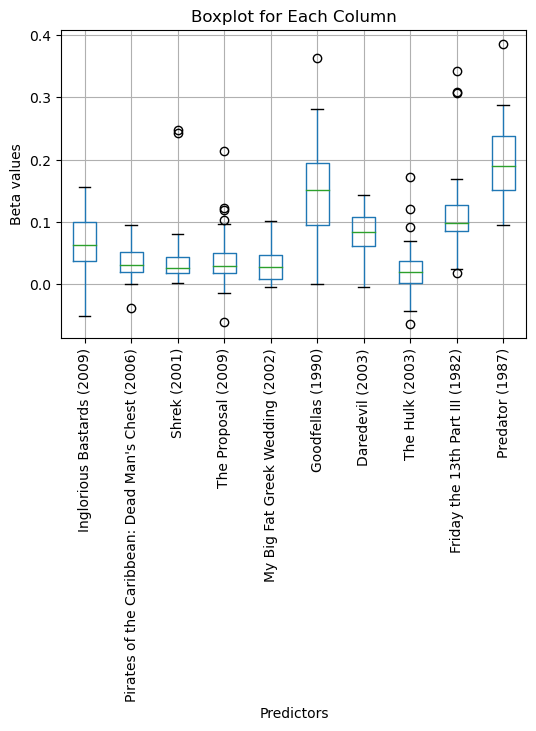

<Figure size 640x480 with 0 Axes>

In [31]:
betas_lasso = pd.DataFrame(beta_results_lasso.Betas.tolist(), index= beta_results.index)
# Create a boxplot for each column
ax = betas_lasso.boxplot(figsize=(6,4))
# Set custom x-axis labels
ax.set_xticklabels(input_10_df.columns, rotation=90)
plt.xlabel('Predictors')
plt.ylabel('Beta values')
plt.title('Boxplot for Each Column')
# Show the plot
plt.show()
plt.savefig('boxplot_lasso.png')

We performed a grid search on 7 alpha parameter values (10-3, 10-2, ... 100, 1000) to determine which alpha value best performed the prediction and obtained 0.010 and 0.001 as the only alphas. Thus, we redefined the model for alpha values ranging from 0.0001 to 0.1. We did not observe any marked improvement in the RMSE but used this model to plot a boxplot for the beta values of the 10 predictors. The result we got was almost identical to that of L2 regression model with Goodfellas and Predator as the best predictors. This result suggest that L1 and L2 regression model had similar performance on our data.

# Logistic Regression
We will perform logistic regression for our movies. We first calculated each user's mean ratings across all movies and stored them as X for our logistic regression model. We then sorted all 400 movies according to their mean ratings from all the users. 4 movies in the middle of this sorted list were picked, we found the median rating of each movie and based on this, we labeled every rating of each movie as 0 (= not enjoyed) and 1 (= enjoyed). Every rating that is greater than the median of the movie is labeled as 1 and as 0 if it is smaller than the median. K-fold cross validation method will also be performed on the training sets to prevent overfitting.

In [32]:
X = data.iloc[:,0:400].mean(axis=1) #ignoring Nan values by default
nan_indices = X.isnull()
# Get the indices where row_means has NaN values
indices_with_nan = nan_indices[nan_indices].index
# Remove corresponding rows from df_filled
X = X.drop(indices_with_nan)
X = X.reset_index(drop=True)
X

0       2.742857
1       2.727273
2       3.314815
3       2.414634
4       2.266949
          ...   
1091    3.200000
1092    3.673669
1093    3.132530
1094    3.390625
1095    2.873874
Length: 1096, dtype: float64

In [33]:
avg_movie_ratings = data.iloc[:,0:400].mean(axis=0)
sorted_avg_ratings = avg_movie_ratings.sort_values()
midpoint = len(sorted_avg_ratings) // 2
# Select 4 values around the midpoint
target_movies = sorted_avg_ratings[midpoint - 2: midpoint + 2]
target_movies

Fahrenheit 9/11 (2004)         2.578014
Happy Gilmore (1996)           2.581169
Diamonds are Forever (1971)    2.582677
Scream (1996)                  2.584270
dtype: float64

In [34]:
selected_columns = df_filled[target_movies.index]
medians = selected_columns.median()
medians

Fahrenheit 9/11 (2004)         2.798028
Happy Gilmore (1996)           2.808316
Diamonds are Forever (1971)    2.799387
Scream (1996)                  2.816788
dtype: float64

In [35]:
df_labels = pd.DataFrame(index=X.index, columns=medians.index)

In [36]:
df_filled

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1092,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1093,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1094,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [37]:
# Labeling ratings data. (Enjoyed = 1, not enjoyed = 0)
df_labels = pd.DataFrame(index=X.index, columns=medians.index)
# Populate the DataFrame based on the conditions
for movie in medians.index:
    col_index = df_filled.columns.get_loc(movie)
    df_labels[movie] = (df_filled.iloc[:,col_index] >= medians[movie]).astype(int)
df_labels

,Fahrenheit 9/11 (2004),Happy Gilmore (1996),Diamonds are Forever (1971),Scream (1996)
0,0,1,0,0
1,0,0,0,0
2,1,1,1,1
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
1091,1,1,1,1
1092,1,1,1,1
1093,1,1,1,1
1094,1,1,1,1


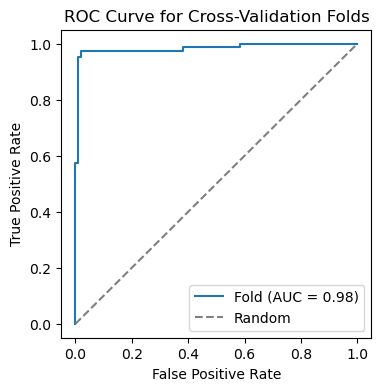

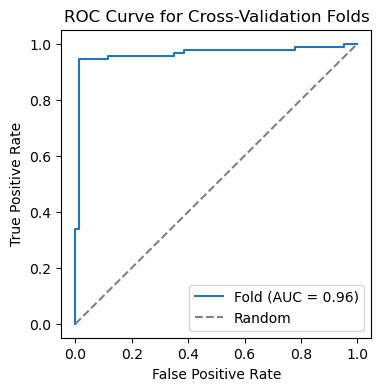

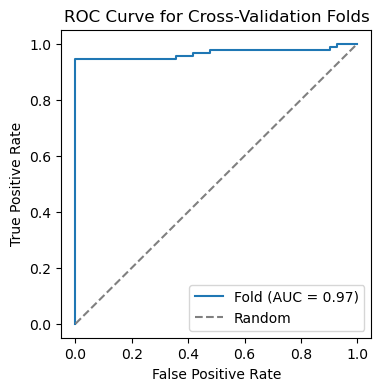

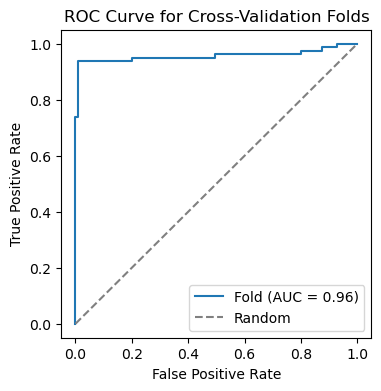

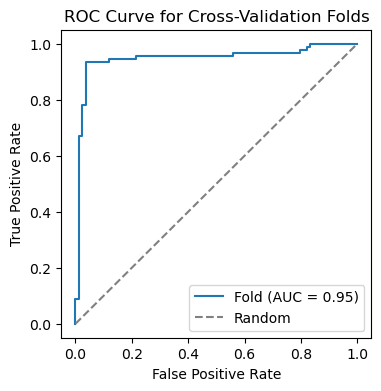

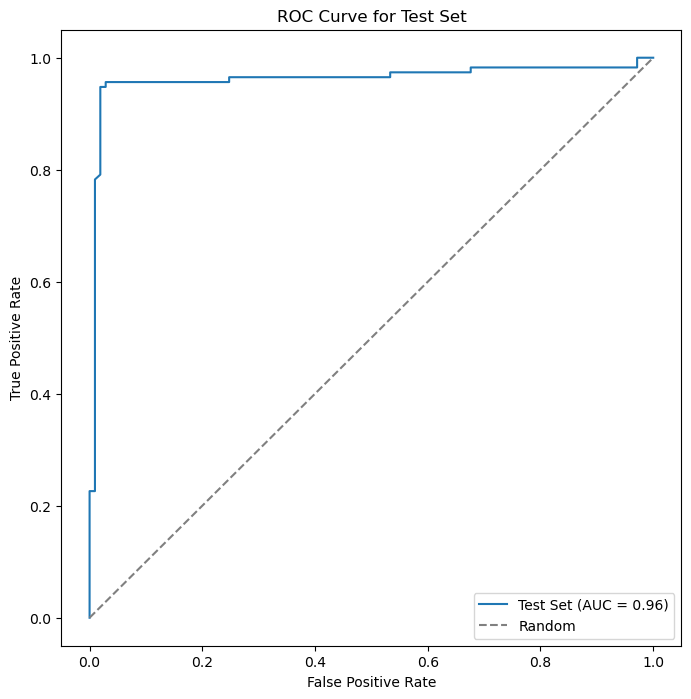

Final Model Betas: [[7.28782443]]
Final Model AUC on Test Set: 0.96


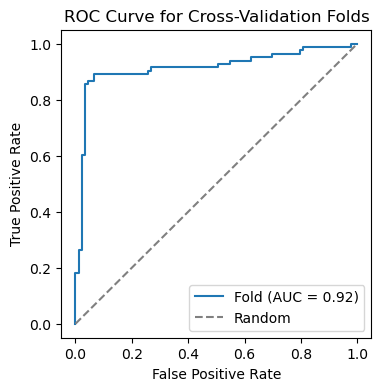

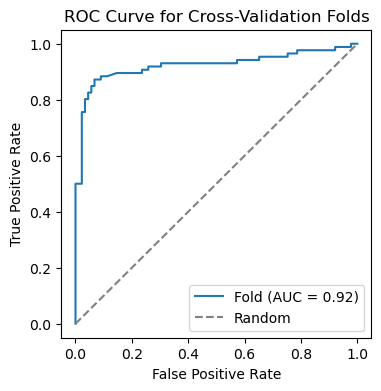

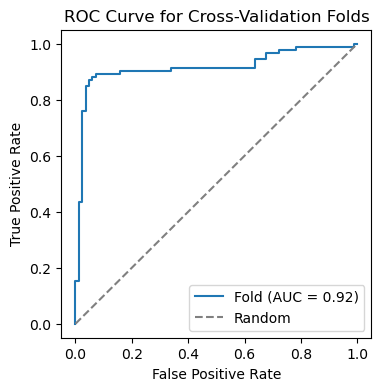

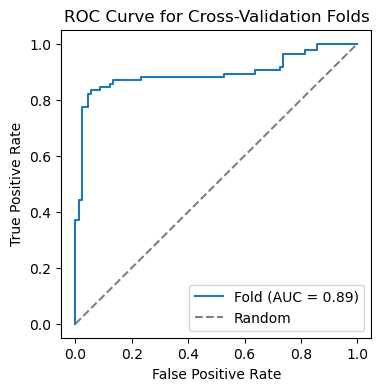

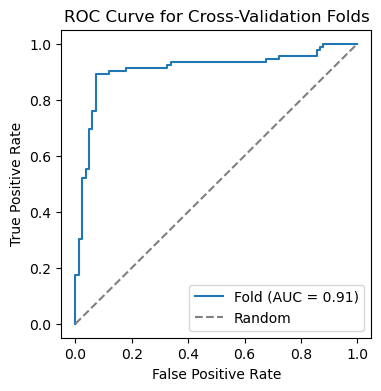

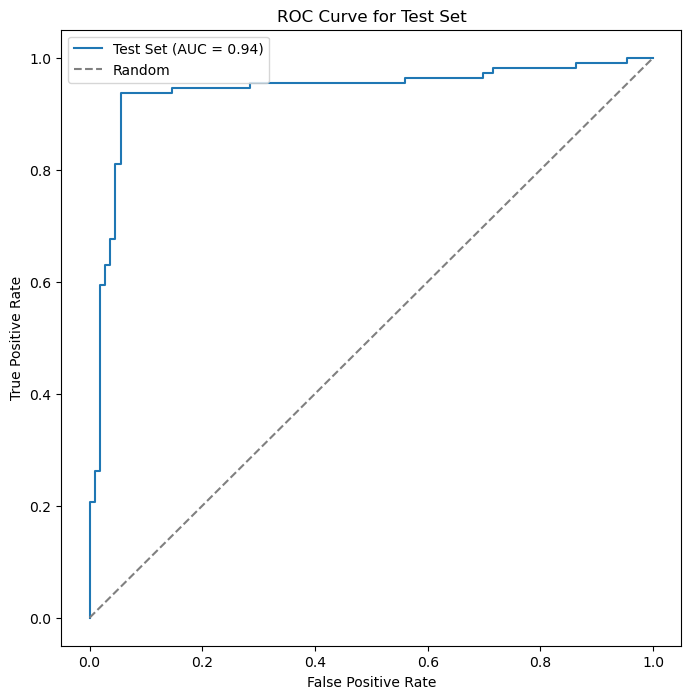

Final Model Betas: [[4.9307424]]
Final Model AUC on Test Set: 0.94


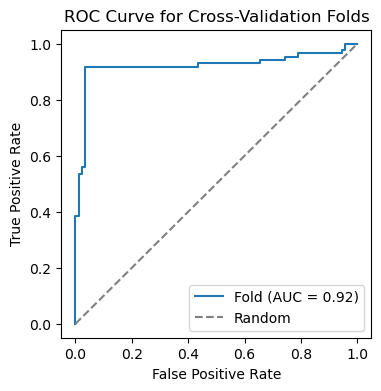

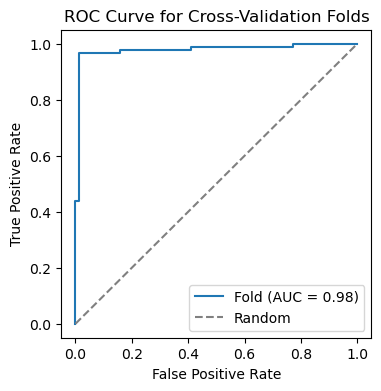

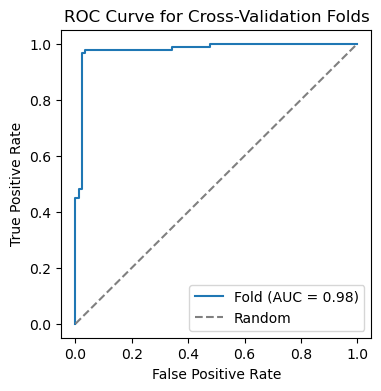

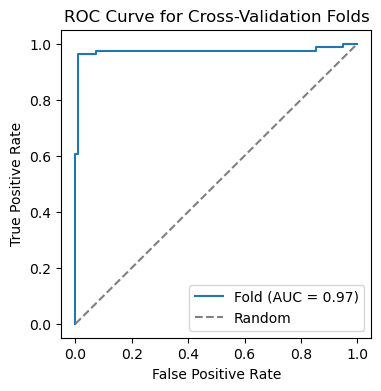

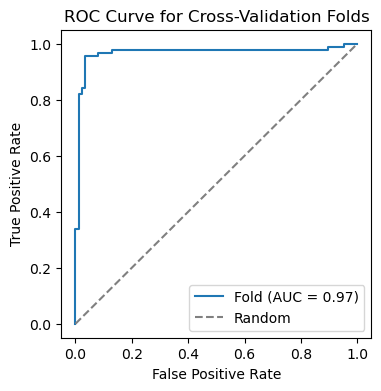

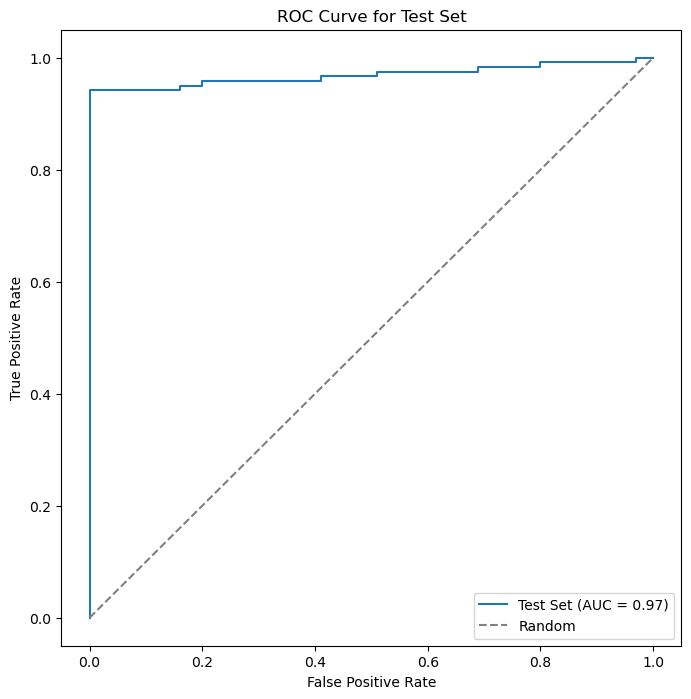

Final Model Betas: [[7.09364767]]
Final Model AUC on Test Set: 0.97


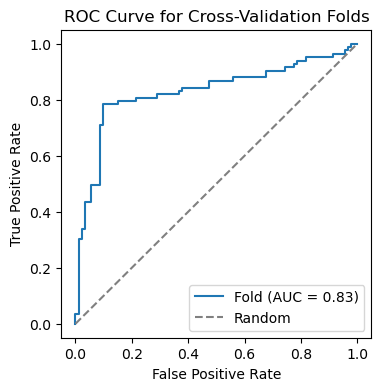

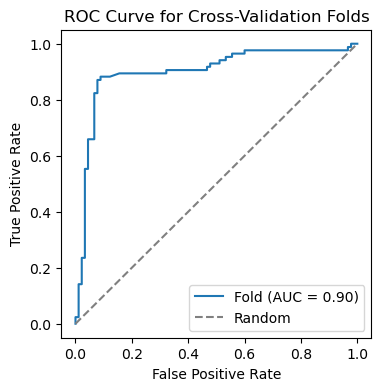

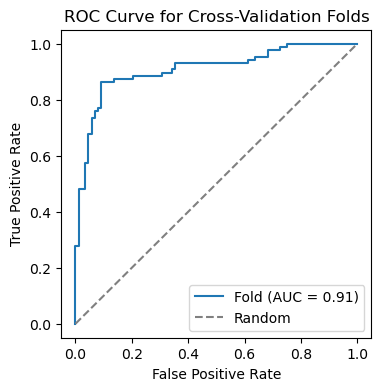

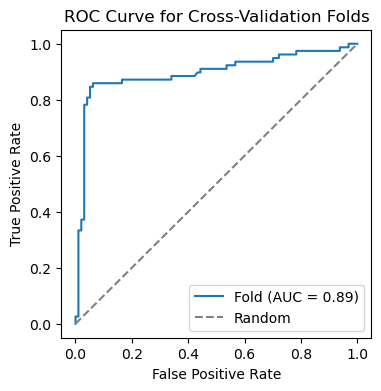

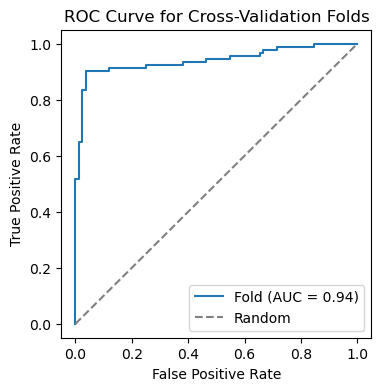

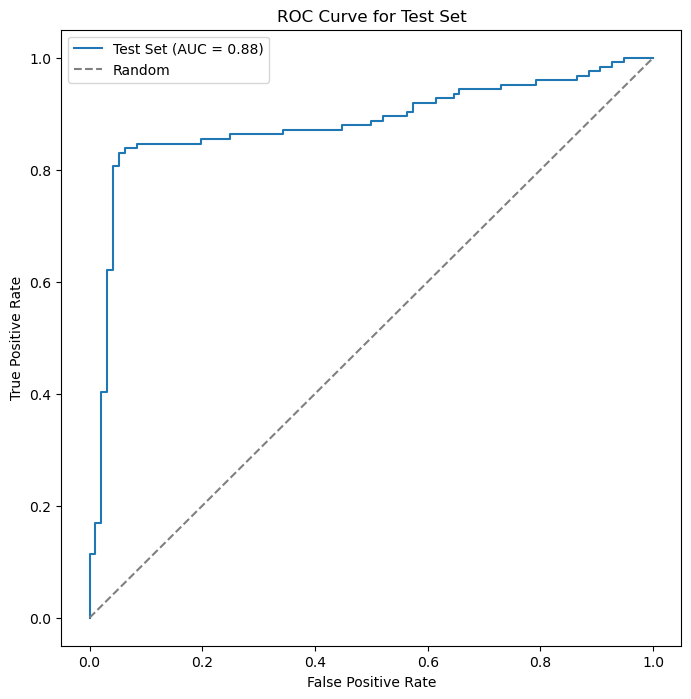

Final Model Betas: [[4.56740809]]
Final Model AUC on Test Set: 0.88


In [38]:
results_q5 = pd.DataFrame(columns=['Movie', 'AUC', 'B1', 'B0'])
reports=[]
matrices=[]
for movie in df_labels.columns:
    Y = df_labels[movie]
    # Set up train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # Set up KFold cross-validation with k=5
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Initialize logistic regression model
    model = LogisticRegression()

    # Perform k-fold cross-validation on the training set
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]
        X_train_fold = np.array(X_train_fold).reshape(-1,1)
        model.fit(X_train_fold, Y_train_fold)
        # Make predictions on the validation fold
        X_val_fold = np.array(X_val_fold).reshape(-1,1)
        predicted_probs = model.predict_proba(X_val_fold)[:, 1]

        # Plot ROC curve for each fold
        fpr, tpr, _ = roc_curve(Y_val_fold, predicted_probs)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label=f'Fold (AUC = {roc_auc_score(Y_val_fold, predicted_probs):.2f})')
        plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
        plt.title('ROC Curve for Cross-Validation Folds')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.show()

    X_train = np.array(X_train).reshape(-1,1)
    X_test = np.array(X_test).reshape(-1,1)
    # Train the model on the entire training set
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    predicted_probs_test = model.predict_proba(X_test)[:, 1]

    # Plot ROC curve for the test set
    fpr_test, tpr_test, _ = roc_curve(Y_test, predicted_probs_test)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {roc_auc_score(Y_test, predicted_probs_test):.2f})')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
    plt.title('ROC Curve for Test Set')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

    # Report betas (coefficients) for the final model
    betas = model.coef_
    intercept = model.intercept_
    print(f'Final Model Betas: {betas}')

    # Report AUC value for the test set
    auc_test = roc_auc_score(Y_test, predicted_probs_test)
    print(f'Final Model AUC on Test Set: {auc_test:.2f}')
    results_q5 = pd.concat([results_q5,pd.DataFrame({'Movie': [movie], 'AUC': [auc_test], 'B1':[betas], 'B0':[intercept]})], ignore_index=True)
    report = classification_report(Y_test, (predicted_probs_test > 0.5).astype(int))
    matrix = confusion_matrix(Y_test, (predicted_probs_test > 0.5).astype(int))
    reports.append(report)
    matrices.append(matrix)

Above graph showed the ROC curve for each of the folds and the test set for each of every movies we selected. For our first movie, all of our folds performed very well, the lowest AUC we had was 0.95, meaning the model was highly capable of distinguishing between the two classes (enjoyed vs. not enjoyed). The ROC line was bow toward the top left corner of the plot, far from the random line suggesting the model performs significantly better than random guessing. The ROC curve for the test set also achieved a great result with an AUC of 0.96 and the ROC curve far from the random line. It suggests that our model performed very well and is highly effective for predicting movie enjoyment, it also suggests that the average user rating is a very strong predictor of whether a user will enjoy a movie. For our second movie, our 5 folds had a slightly worse performance than the first movie, with AUC from 0.89 to 0.92. And ROC curves closer to the random line. Our model performed better on the test set with an AUC of 0.94 and a ROC curve far from the random line. This suggests that our model had no indication of overfitting since the performance is even slightly better on the test set and the prediction of enjoyment is very precise. For our third movie, our model performed better than the previous two movies, with an AUC of 0.92, 0.98, 0.98, 0.97, 0.97 on the CV folds and an AUC of 0.97 on the test set. This suggests that our model performed significantly on the third movie and made the best predictions on the enjoyment of the movie. For our last movie, we had an AUC ranging from 0.83 to 0.94 on our CV folds and an AUC of 0.88 on the test set. The model performance was slightly worse than other models but still made predictions at an effective level. It also suggests that for the fourth movie, the average user rating is not as strong of a predictor as what we have seen in other movies.

In [39]:
results_q5

,Movie,AUC,B1,B0
0,Fahrenheit 9/11 (2004),0.961781,[[7.287824429539092]],[-21.895420517145485]
1,Happy Gilmore (1996),0.939582,[[4.930742398208227]],[-14.76121669003268]
2,Diamonds are Forever (1971),0.968833,[[7.0936476691888215]],[-21.360453514308713]
3,Scream (1996),0.881300,[[4.567408089572133]],[-13.764657728682115]


All of our B1 values are positive, indicating a positive relationship that as the average movie rating increases, so does the log odds of the movie being enjoyed. The B0 values are all negative and large in absolute value, suggesting that when we have no information from the average user rating, the model strongly leans towards predicting that the movie will not be enjoyed. The difference in betas cross movies indicates differences in how much the average ratings influence the prediction of enjoyment for different movies. All of our AUC values are relatively high, indicating all four of our models on each movie performed very well. 

In [40]:
for report in reports:
    print(report)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.94      0.96      0.95       115

    accuracy                           0.95       220
   macro avg       0.95      0.94      0.95       220
weighted avg       0.95      0.95      0.95       220

              precision    recall  f1-score   support

           0       0.93      0.86      0.90       109
           1       0.87      0.94      0.90       111

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       100
           1       1.00      0.94      0.97       120

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220

              preci

The quality of our four models is outstanding, as evidenced by their strong performance on the test set, where each model achieved a high Area Under the Curve (AUC) score, demonstrating their effective predictive capabilities.